# Linear Regression

## Implementation on Boston Housing Dataset

This is the linear regression algorithm on boston housing dataset in order to predict the price of a house knowing its features.

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

### Loading the Dataset 

In [1]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Understanding the dataset

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.target.shape

(506,)

In [28]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Converting the data into DataFrame

In [7]:
df=pd.DataFrame(boston.data)
df.columns=boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df['Price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
x=boston.data
y=boston.target

### Train and Test set for the model 

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)
print("Xtrain : ",xtrain.shape)
print("Xtest : ",xtest.shape)
print("Ytrain : ",ytrain.shape)
print("Ytest : ",ytest.shape)

Xtrain :  (404, 13)
Xtest :  (102, 13)
Ytrain :  (404,)
Ytest :  (102,)


### Training and prediction of the model 

In [17]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

y_pred=regressor.predict(xtest)
y_pred

array([12.07495986, 26.9894969 , 17.58803353, 18.15584511, 36.92091659,
       25.43267386, 31.09256932, 19.72549907, 19.66103377, 22.96358632,
       28.38841214, 28.48925986, 18.99690357, 32.41097504, 21.52350275,
       15.25945122, 21.23364112, 11.6220597 , 11.37109662, 13.63515584,
        5.62431971, 17.35323315, 20.80951594, 22.51311312, 16.39055556,
       20.32352451, 17.88994185, 14.23445109, 21.1187098 , 17.50765806,
       14.54295525, 23.63289896, 34.32419647, 22.23027161, 16.82396516,
       20.16274383, 30.67665825, 35.61882904, 23.50372003, 24.66451121,
       36.91269871, 32.33290254, 19.11785719, 32.19546605, 33.42795148,
       25.52705821, 40.63477427, 18.21762788, 19.34587461, 23.80167377,
       33.42122982, 26.1451108 , 18.10363121, 28.19906437, 13.37486655,
       23.34019279, 24.44952678, 33.54973856, 16.71263275, 36.56402224,
       15.69684554, 18.55447039, 32.14543203, 15.49568061, 39.02363234,
       27.38174402, 31.96333419, 10.09436162, 19.13214621, 21.73

### Plotting the trained model

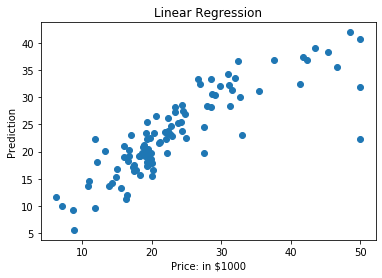

In [25]:
plt.scatter(ytest,y_pred)
plt.xlabel('Price: in $1000')
plt.ylabel('Prediction')
plt.title('Linear Regression')
plt.show()

### Figuring the error in the model

In [19]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,y_pred)
print("Mean Squared Error : ",mse)

Mean Squared Error :  25.41958712682191


### Accuracy Score

In [22]:
acc=regressor.score(xtest,ytest)

In [24]:
print("Accracy of the model : ",acc*100)

Accracy of the model :  72.63451459702503


# Thanks for your reference.